# Goal

Understand the independent variable that will be used for subsequent ML applications

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pubchempy as pcp


%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [20]:
colnames = ['PUBCHEM_RESULT_TAG', 'PUBCHEM_SID', 'PUBCHEM_CID',
       'PUBCHEM_ACTIVITY_OUTCOME', 'PUBCHEM_ACTIVITY_SCORE',
       'PUBCHEM_ACTIVITY_URL', 'PUBCHEM_ASSAYDATA_COMMENT', 'Phenotype',
       'Potency', 'Efficacy', 'Analysis Comment', 'Curve_Description',
       'Fit_LogAC50', 'Fit_HillSlope', 'Fit_R2', 'Fit_InfiniteActivity',
       'Fit_ZeroActivity', 'Fit_CurveClass', 'Excluded_Points', 'Max_Response',
       'Activity at 0.0000368000 uM', 'Activity at 0.0001704127 uM',
       'Activity at 0.0003680000 uM', 'Activity at 0.0008534482 uM',
       'Activity at 0.00184 uM', 'Activity at 0.00427 uM',
       'Activity at 0.00920 uM', 'Activity at 0.021 uM',
       'Activity at 0.046 uM', 'Activity at 0.107 uM', 'Activity at 0.230 uM',
       'Activity at 0.534 uM', 'Activity at 1.150 uM', 'Activity at 2.666 uM',
       'Activity at 5.750 uM', 'Activity at 12.80 uM', 'Activity at 28.70 uM',
       'Compound QC']

data = pd.read_csv('../data/raw/csv/compounds_malaria_all.csv', skiprows=6, header=None, names=colnames)

In [22]:
pd.options.display.max_columns = 999
data.head(n=20)

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Phenotype,Potency,Efficacy,Analysis Comment,Curve_Description,Fit_LogAC50,Fit_HillSlope,Fit_R2,Fit_InfiniteActivity,Fit_ZeroActivity,Fit_CurveClass,Excluded_Points,Max_Response,Activity at 0.0000368000 uM,Activity at 0.0001704127 uM,Activity at 0.0003680000 uM,Activity at 0.0008534482 uM,Activity at 0.00184 uM,Activity at 0.00427 uM,Activity at 0.00920 uM,Activity at 0.021 uM,Activity at 0.046 uM,Activity at 0.107 uM,Activity at 0.230 uM,Activity at 0.534 uM,Activity at 1.150 uM,Activity at 2.666 uM,Activity at 5.750 uM,Activity at 12.80 uM,Activity at 28.70 uM,Compound QC
0,1,842121,6603008.0,Inactive,0,http://assay.nih.gov/htsws/rest/display/ddeath...,NaN,Inactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0 0 0 0 0 0,28.1646,NaN,NaN,NaN,NaN,-6.9510,NaN,NaN,NaN,21.8992,NaN,18.4781,NaN,-0.4938,NaN,25.8019,NaN,28.1646,QC'd by DPISMR
1,2,842122,6602571.0,Active,84,http://assay.nih.gov/htsws/rest/display/ddeath...,NaN,Inhibitor,2.6169,84.2210,NaN,Complete curve; high efficacy,-5.5822,2.6384,0.9846,-73.2210,11.0000,-1.1,0 0 0 0 0 0,-73.1380,NaN,NaN,NaN,NaN,2.2122,NaN,NaN,NaN,17.7545,NaN,12.6914,NaN,1.8917,NaN,-64.1880,NaN,-73.1380,QC'd by Asinex Ltd.
2,3,842123,6602616.0,Inactive,0,http://assay.nih.gov/htsws/rest/display/ddeath...,NaN,Inactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0 0 0 0 0 0,7.5096,NaN,NaN,NaN,NaN,-5.8047,NaN,NaN,NaN,-8.4259,NaN,-25.7465,NaN,-25.1164,NaN,-1.7073,NaN,7.5096,QC'd by DPISMR
3,4,842124,644371.0,Unspecified,0,http://assay.nih.gov/htsws/rest/display/ddeath...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QC'd by DPISMR
4,5,842125,6603132.0,Inconclusive,10,http://assay.nih.gov/htsws/rest/display/ddeath...,NaN,Inhibitor,11.6891,106.9500,NaN,Single point of activity,-4.9322,4.5045,0.9928,-102.5710,4.3794,-3.0,0 0 0 0 0 0,-100.5600,NaN,NaN,NaN,NaN,8.9243,NaN,NaN,NaN,0.8559,NaN,0.0497,NaN,8.0941,NaN,0.1928,NaN,-100.5600,QC'd by Asinex Ltd.
5,6,842126,2850911.0,Inactive,0,http://assay.nih.gov/htsws/rest/display/ddeath...,NaN,Inactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0 0 0 0 0 0,21.7059,NaN,NaN,NaN,NaN,2.1736,NaN,NaN,NaN,0.0000,NaN,9.4757,NaN,17.5183,NaN,2.9541,NaN,21.7059,QC'd by DPISMR
6,7,842127,6603374.0,Inactive,0,http://assay.nih.gov/htsws/rest/display/ddeath...,NaN,Inactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0 1 0 0 0 1,-15.1982,NaN,NaN,NaN,NaN,-19.5876,NaN,NaN,NaN,-50.0108,NaN,2.1234,NaN,0.2244,NaN,-12.9837,NaN,-15.1982,QC'd by Asinex Ltd.
7,8,842128,6603127.0,Inactive,0,http://assay.nih.gov/htsws/rest/display/ddeath...,NaN,Inactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0 0 0 0 0 0,13.6353,NaN,NaN,NaN,NaN,5.4665,NaN,NaN,NaN,-9.8174,NaN,11.0821,NaN,5.2130,NaN,7.4849,NaN,13.6353,QC'd by DPISMR
8,9,842129,644380.0,Active,43,http://assay.nih.gov/htsws/rest/display/ddeath...,NaN,Inhibitor,8.2753,123.3890,NaN,Partial curve; high efficacy,-5.0822,1.7885,0.9853,-109.5070,13.8826,-2.1,0 0 0 0 0 0,-97.2917,NaN,NaN,NaN,NaN,9.7994,NaN,NaN,NaN,23.4264,NaN,7.4876,NaN,12.4272,NaN,-28.4762,NaN,-97.2917,QC'd by DPISMR
9,10,842130,2900108.0,Inconclusive,10,http://assay.nih.gov/htsws/rest/display/ddeath...,NaN,Inhibitor,0.0828,47.9006,NaN,Complete curve; high efficacy; poor fit,-7.0822,4.9549,0.4232,-46.5298,1.3709,-1.3,0 0 0 0 0 1,0.0000,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,0.0000,NaN,-58.0698,NaN,-81.2914,NaN,0.0000,NaN,0.0000,QC'd by DPISMR


In [25]:
# Get a subset of the data for quicker exploration
subset = data.sample(n=100000)

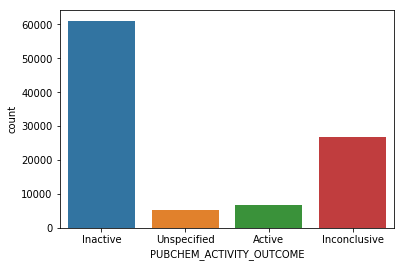

In [26]:
# Pubchem does some classification on it's own
# unfortunately, a lot of these are 'inconclusive'
sns.countplot(subset.PUBCHEM_ACTIVITY_OUTCOME)

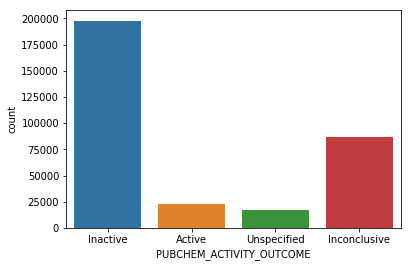

In [65]:
# What are the numbers for the full dataset?
sns.countplot(data.PUBCHEM_ACTIVITY_OUTCOME)

# 200k inactive
# 25k active

6857 0
26803 0
18775 42301


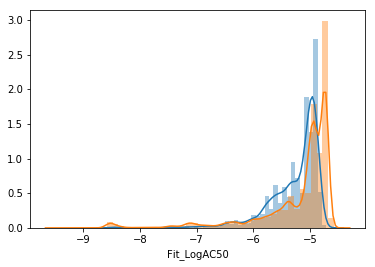

In [37]:
# What does the potency distribution look like for the active compounds?
sns.distplot(subset[subset.PUBCHEM_ACTIVITY_OUTCOME == 'Active'].Fit_LogAC50)
sns.distplot(subset[subset.PUBCHEM_ACTIVITY_OUTCOME == 'Inconclusive'].Fit_LogAC50)

# Are they all defined?
active = subset[subset.PUBCHEM_ACTIVITY_OUTCOME == 'Active']
inconcl = subset[subset.PUBCHEM_ACTIVITY_OUTCOME == 'Inconclusive']
inactive = subset[subset.PUBCHEM_ACTIVITY_OUTCOME == 'Inactive']
# print the number of NANs / total 
print(np.count_nonzero(~np.isnan(active.Fit_LogAC50)), np.count_nonzero(np.isnan(active.Fit_LogAC50)))
print(np.count_nonzero(~np.isnan(inconcl.Fit_LogAC50)),  np.count_nonzero(np.isnan(inconcl.Fit_LogAC50)))
print(np.count_nonzero(~np.isnan(inactive.Fit_LogAC50)),  np.count_nonzero(np.isnan(inactive.Fit_LogAC50)))


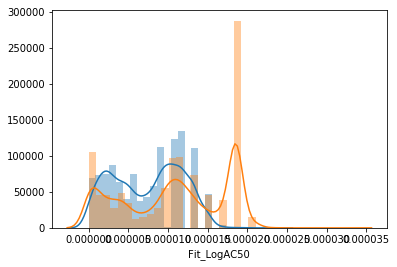

In [60]:
# Un-logged
sns.distplot(10**subset[subset.PUBCHEM_ACTIVITY_OUTCOME == 'Active'].Fit_LogAC50)
sns.distplot(10**subset[subset.PUBCHEM_ACTIVITY_OUTCOME == 'Inconclusive'].Fit_LogAC50)

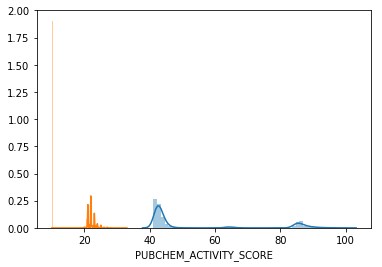

In [64]:
#What's the activity score?
sns.distplot(active.PUBCHEM_ACTIVITY_SCORE)
sns.distplot(inconcl.PUBCHEM_ACTIVITY_SCORE)

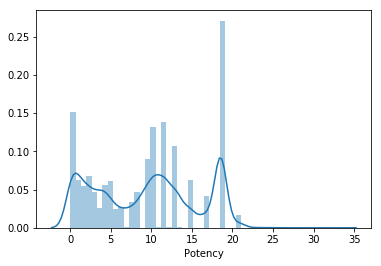

In [40]:
sns.distplot(active.PUBCHEM_ACTIVITY_SCORE)# What are potency and efficacy?
sns.distplot(subset.Potency.dropna())

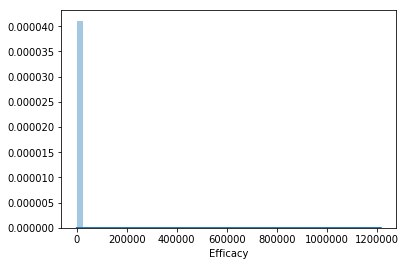

In [52]:
ax = sns.distplot(subset.Efficacy.dropna())

[(0, 1000)]

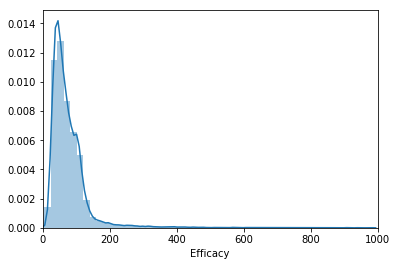

In [53]:
ax = sns.distplot(subset.Efficacy.dropna()[subset.Efficacy < 1000])
ax.set(xlim=(0, 1000))

[(0, 200)]

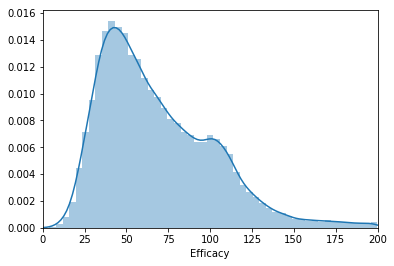

In [54]:
ax = sns.distplot(subset.Efficacy.dropna()[subset.Efficacy < 200])
ax.set(xlim=(0, 200))

[(0, 250)]

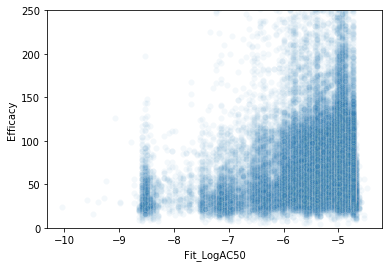

In [59]:
ax = sns.scatterplot(subset.Fit_LogAC50, subset.Efficacy.dropna(), alpha=0.05)
ax.set(ylim=(0, 250))